## Inferencia bayesiana

Estamos interesados ​​en comprender la altura de los programadores de Python. 
Se desconoce el número exacto de programadores de Python en el mundo, pero podemos pensar que son millones.

Un primer enfoque sería preguntarnos a cada uno por nuestra altura, y podríamos responder la pregunta. Pero esto no parece factible.

Entonces, usaremos estadísticas para encontrar una solución. Y hay dos cosas que necesitamos, para empezar:

    Un modelo que representa la altura de los programadores de Python
    Una muestra de datos con la altura de unos pocos programadores de Python.

En general, los modelos estadísticos se definen mediante algunos parámetros. Por ejemplo, una distribución normal se define por su media y su desviación estándar. Una distribución exponencial se define por su lambda.

El objetivo de la inferencia estadística es, dado un modelo estadístico, encontrar los parámetros de nuestra población de interés, basándose en los datos observados extraídos de ella.

Si decidimos modelar la altura de los programadores de Python con una distribución normal, nuestro problema de inferencia es encontrar la media y la desviación estándar de la altura de todos los programadores de Python. Y para encontrar estos parámetros, usaremos una muestra de programadores de Python con altura conocida.

Algo que debemos tener en cuenta es que la muestra utilizada para la inferencia debe ser imparcial. En resumen, las diferentes partes del problema, para nuestro ejemplo, son:

1. Una muestra de datos x de la población de interés.  Ejemplo: Altura de una muestra de programadores Python, 183 cms, 168 cms, 177 cms, etc.

2. Un modelo estadístico que genera datos de forma similar a la población de interés. Ejemplo: la distribución normal.

3.  Los parámetros del modelo. Ejemplo: la media μ y la desviación estándar σ de una distribución normal.

## Evaluar un conjunto de parámetros

Antes de entrar en el proceso de encontrar los mejores parámetros, comenzaremos eligiendo algunos arbitrarios y evaluaremos qué tan buenos son. Por ejemplo, podemos elegir los valores μ = 175 y σ = 5, que podría ser una primera aproximación razonable.

Para evaluar la bondad de un conjunto de valores de parámetros, usamos la fórmula de Bayes (de ahí el nombre de inferencia bayesiana):
P (θ | x) = P (x | θ) ⋅P (θ) P (x)

Dado el modelo (una distribución normal en este caso), P (θ | x) es la probabilidad de que los parámetros θ (que son μ y σ en este caso) después de observar los datos x. Cuanto mayor sea la probabilidad de los valores de los parámetros dados los datos, más probable será que sean los parámetros "reales" de la distribución de la población.

Esto significa que podemos transformar nuestro problema de encontrar los parámetros de la distribución de la población, en encontrar los valores de los parámetros que maximizan el valor P (θ | x).

En terminología bayesiana, P (θ | x) se conoce como conocimiento posterior y es función de otros tres valores:

- P (x | θ): la posibilidad, que es la probabilidad de obtener los datos x del modelo con los parámetros  θ que estamos evaluando.

- P(θ): conocimiento a priori, que es nuestro conocimiento sobre los parámetros antes de ver ningún dato.

- P (x): la evidencia, que es la probabilidad de los datos, no dado ningún conjunto específico de parámetros  θ, pero dado el modelo que elegimos.

##Posibilidad

Es la probabilidad de obtener los datos x
del modelo elegido (por ejemplo, la distribución normal) y para un conjunto específico de parámetros θ (por ejemplo, μ = 175 y σ = 5).

A menudo se representa como L (θ | x)
(tenga en cuenta que el orden de θ y x se invierte cuando se usa la notación de probabilidad).

En el caso de una distribución normal, la fórmula para calcular la probabilidad dada x (su función de densidad de probabilidad) es:
L (θ | x) = P (x | θ) = P (x | μ, σ) = 


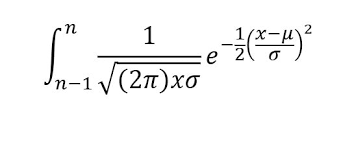

Si lo trazamos, obtenemos la famosa curva de campana normal (usamos μ = 175
y σ = 5). 

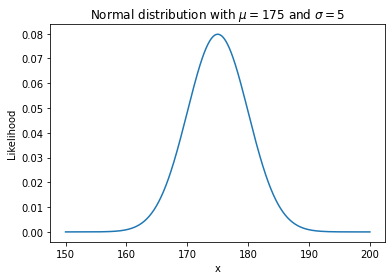

In [ ]:
import numpy
import scipy.stats
from matplotlib import pyplot

mu = 175.
sigma = 5.

x = numpy.linspace(150., 200., 501)
likelihood = scipy.stats.norm.pdf(x, mu, sigma)

pyplot.plot(x, likelihood)
pyplot.xlabel('x')
pyplot.ylabel('Likelihood')
pyplot.title('Normal distribution with $\mu=175$ and $\sigma=5$');

Siguiendo el ejemplo, queríamos puntuar qué tan buenos son los parámetros μ = 175 y σ = 5

para nuestros datos. Hasta ahora elegimos estos parámetros arbitrariamente, pero los elegiremos de una manera más inteligente más adelante.

Si tomamos la función de densidad de probabilidad (p.d.f.) de la distribución normal y calculamos para el primer punto de datos de x= 183, tenemos:


In [ ]:
import math

likelihood = 1. / math.sqrt(2 * math.pi * (5 **2)) * math.exp(-((183 - 175) ** 2) / (2 * (5 ** 2)))
likelihood

0.022184166935891113

Si comprobamos este valor en la gráfica, podemos ver que es la probabilidad del valor 183 dada una distribución normal con μ = 175 y σ = 5:

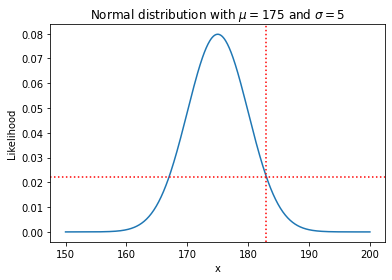

In [ ]:
import math
import numpy
import scipy.stats
from matplotlib import pyplot

likelihood_183 = 1. / math.sqrt(2 * math.pi * (5 **2)) * math.exp(-((183 - 175) ** 2) / (2 * (5 ** 2)))

mu = 175.
sigma = 5.

x = numpy.linspace(150., 200., 501)
likelihood = scipy.stats.norm.pdf(x, mu, sigma)

pyplot.plot(x, likelihood)
pyplot.xlabel('x')
pyplot.ylabel('Likelihood')
pyplot.title('Normal distribution with $\mu=175$ and $\sigma=5$')
pyplot.axvline(x=183, color='red', linestyle=':')
pyplot.axhline(likelihood_183, color='red', linestyle=':');

Con **scipy** podemos calcular fácilmente la probabilidad de todos los valores en nuestros datos:

In [ ]:
import scipy.stats

mu = 175.
sigma = 5.

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x, mu, sigma)

array([0.02218417, 0.02994549, 0.07365403, 0.04839414, 0.07978846,
       0.07365403, 0.06664492, 0.01579003, 0.07820854, 0.06664492])

## Conocimiento A priori

Este es nuestro conocimiento de los parámetros antes de observar los datos. Probablemente sea la parte más subjetiva de la inferencia bayesiana y se pueden utilizar diferentes enfoques:

- Podemos utilizar antecedentes informados e intentar dar al modelo la mayor cantidad de información posible. 
- Utilice a priori no informados y deje que el proceso encuentre los parámetros utilizando principalmente los datos.

En nuestro caso, podemos empezar a pensar cuáles son los posibles valores para una distribución normal.

Para la media, el rango está entre −∞ y ∞. Pero, por supuesto, podemos hacerlo mejor que esto.

Estamos interesados ​​en la media de la altura de los desarrolladores de Python. Y es fácil ver que la altura mínima posible para cualquier cosa es 0. Y para el máximo, podemos comenzar considerando la altura humana máxima conocida. Esto es 272 cms, la altura máxima medida de Robert Pershing Wadlow, nacido en 1918. Podemos estar muy seguros de que la media de la altura de los desarrolladores de Python está en el rango de 0 a 272. Entonces, una primera opción para un previo desinformado podría ser todos los valores en este rango con igual probabilidad.

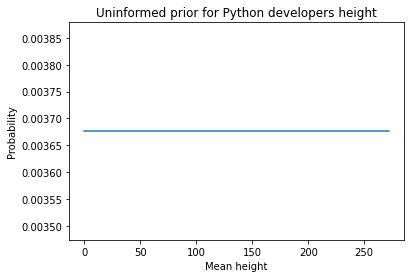

In [ ]:
import numpy
import scipy.stats
from matplotlib import pyplot

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.uniform.pdf(mean_height, 0, 272)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Uninformed prior for Python developers height');

Esto podría funcionar, pero podemos hacerlo mejor. Con solo 10 puntos de datos, la cantidad de información que podemos aprender de ellos es bastante limitada. Y podemos terminar usando estos 10 puntos de datos para descubrir algo que ya sabemos. Que la probabilidad de que la altura media sea 0 es nula, ya que es la probabilidad de la altura máxima jamás observada. Y que la probabilidad de un valor como 175 cms es mucho mayor que la probabilidad de un valor como 120 cms.

Si sabemos todo esto antes de observar cualquier dato, ¿por qué no utilizarlo? Esto es exactamente lo que es a priori. La parte complicada es definir eso previo exactamente.

En este caso, no conocemos la media de la altura de los desarrolladores de Python, pero podemos comprobar la media de la altura de la población mundial, que es alrededor de 165. Este no tiene por qué ser el valor que estamos buscando Se sabe que hay más programadores de Python masculinos que femeninos, y la altura masculina es mayor, por lo que el valor que estamos buscando probablemente sea mayor. Además, la altura cambia de un país a otro, y los programadores de Python no están distribuidos por igual en todo el mundo. Pero usaremos nuestros datos para intentar encontrar el valor que considere todos estos sesgos. Lo anterior es solo un punto de partida que ayudará a encontrar el valor más rápido.

Entonces, usemos la media de la población mundial como la media de nuestro anterior, y tomaremos la desviación estándar de la población mundial, 7 cm, y usaremos el doble. Multiplicarlo por 2 es arbitrario, pero haremos que nuestro a priori esté un poco informado. Como se mencionó anteriormente, elegir a priori es bastante subjetivo.

Tenga en cuenta que no es necesario utilizar una distribución normal para la anterior. Antes estábamos considerando una distribución uniforme. Pero en este caso puede tener sentido, ya que estamos más seguros de que la media que estamos buscando estará cerca de la media de la población humana, y que es menos probable que tenga una media extrema.

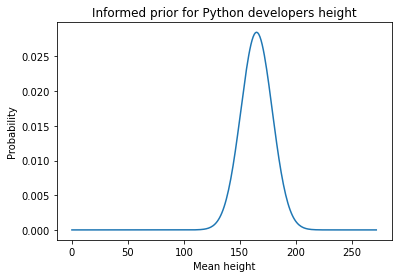

In [ ]:
import numpy
import scipy.stats
from matplotlib import pyplot

world_height_mean = 165
world_height_standard_deviation = 7

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.norm.pdf(mean_height, world_height_mean, world_height_standard_deviation * 2)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for Python developers height');

Si volvemos a nuestro ejemplo, podemos calcular fácilmente el anterior para la primera muestra en x.

In [ ]:
import scipy.stats

world_height_mean = 165
world_height_standard_deviation = 7

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

0.01246879102010001

##Evidencia

La evidencia es la probabilidad de los datos P(x). Toda la fórmula bayesiana asume un cierto modelo (en nuestro caso asumimos que la distribución de la altura de los programadores de Python seguía una distribución normal). Entonces, la evidencia puede verse como la probabilidad de que el modelo provenga de una distribución normal sin importar los parámetros (o cualquier distribución o combinación de ellos que estemos usando para el problema).

Podemos considerar la probabilidad de que los datos provengan de una distribución normal como la suma de las probabilidades de que los datos provengan de cada uno de los posibles parámetros.

Si consideramos la altura una variable discreta (no lo es, pero esto simplifica la explicación), y el rango de sus valores 0 hasta 272

. Y solo consideramos la media e ignoramos la desviación estándar (nuevamente, una simplificación). Entonces, la evidencia se puede expresar como:
P (x) = ∑i = 0 272 P(x | μi)

Cada una de las probabilidades P(x | μi) es una posibilidad, y ya hemos visto cómo calcularlos.

En la práctica, debemos considerar las simplificaciones que hicimos. Primero debemos considerar la desviación estándar (podemos representar μ y σ simplemente como θ). Entonces debemos considerar que ambos son continuos y no discretos. Ser continuo significa que en lugar de una suma, tenemos una integral. Y finalmente, consideraremos el intervalo −∞ yo ∞ en lugar de 0 a 272.

La ecuación real considerando todas estas cosas es:
P (x) = ∫∞ − ∞ P(x | θ) ⋅dθ

Matemáticamente, esta ecuación es más compleja que la anterior, pero conceptualmente son iguales.

## Conocimiento Posterior

Es la probabilidad de los parámetros dados los datos P (θ | x), y es nuestra cantidad de interés, ya que representa qué tan buenos son los parámetros probados.

Como hemos visto, posterior es el resultado del producto de la posibilidad y a priori, dividido por la evidencia (regla de bayes):
P (θ | x) = P (x | θ) ⋅P (θ) P (x)

Hemos visto que calcular la posibilidad y a priori es bastante sencillo. Pero la evidencia puede ser más complicada o simplemente demasiado compleja. La buena noticia es que incluso si no podemos calcular el denominador, ya que es el mismo para todos los parámetros, podemos encontrar el mejor sin él.

Por ejemplo, si estamos considerando μ = 175 y σ = 5, y queremos saber si es mejor o peor que μ = 168 y σ = 7, no necesitamos conocer la evidencia. La evidencia no depende de los parámetros, por lo que será la misma en ambos casos. Entonces, incluso si no conocemos el valor, sabemos que el conjunto de parámetros que maximiza el nominador será el mejor.

Entonces podemos considerar que posterior es proporcional al nominador de la fórmula de Bayes. Esto se puede expresar así:
P (θ | x) ∝P (x | θ) ⋅P (θ)

Volviendo a nuestro ejemplo, podemos calcular posterior para el primer valor en nuestra muestra, 183 (seguiremos llamándolo posterior, incluso si lo que queremos decir es el nominador del posterior):

In [ ]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

likelihoods = scipy.stats.norm.pdf(x, mu, sigma)

posterior = prior * likelihoods[0]

El siguiente paso es calcular el conocimiento posterior para cada punto de datos en x. Al hacerlo, veremos la belleza del método bayesiano.

La idea del método bayesiano es que partimos de nuestro conocimiento previo, que es lo que sabemos antes de ver ningún dato. Y luego lo actualizamos con la posibilidad, que es nuestro conocimiento de los parámetros dados los datos.

Lo interesante es que luego de tener nuestro conocimiento previo (a priori), y actualizarlo con lo que sabemos desde el primer punto de datos, lo que tenemos es el conocimiento previo de los otros puntos de datos.

Entonces, comenzamos con nuestro conocimiento previo, lo multiplicamos por la posibilidad del primer punto de datos y tenemos un conocimiento posterior. Este será nuestro posterior después de haber visto el primer punto de datos, pero al mismo tiempo será nuestro previo antes de ver el resto de las muestras.

Esto hace que el aprendizaje bayesiano sea un proceso iterativo:

    No sabemos nada de alturas, nuestro conocimiento a priori está totalmente desinformado.
    Aprendemos sobre las alturas humanas, podemos actualizar nuestro previo conocimiento desinformado y usar esta información como nuestro nuevo previo cnocimiento. 
    Vemos una primera muestra, actualizamos nuestra conocimiento previo y tenemos un nuevo conocimiento previo para cuando veamos nuevos datos.

Entonces, cada conocimiento posterior que calculamos, es nuestro conocimiento previo para datos futuros.

Volviendo al ejemplo, si repetimos el proceso para cada punto de datos, obtendremos el conocimiento posterior para todo el conjunto de datos:

In [ ]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

likelihoods = scipy.stats.norm.pdf(x, mu, sigma)

posterior = prior
for likelihood in likelihoods:
    posterior = posterior * likelihood

posterior

9.516913237351312e-16

Esto, por supuesto, se puede vectorizar 

In [ ]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

prior * scipy.stats.norm.pdf(x, mu, sigma).prod()

9.516913237351312e-16

## Inferencia bayesiana basada en cuadrículas

Bien, ahora podemos tomar parámetros arbitrarios y calcular qué tan bien explican nuestros datos, calculando un valor proporcional a P(θ | x) 

Pero, ¿cómo podemos calcular los mejores parámetros? El enfoque más simple sería simplemente calcular el valor de todas las combinaciones posibles de parámetros y ver cuál es el que tiene el posterior más alto.

Hagámoslo solo por la media primero (asumiendo que se conoce la desviación estándar, usaremos 7 cm para ella). Para la media, probaremos 1,000 valores diferentes entre 0
y 272:

CPU times: user 337 ms, sys: 11.7 ms, total: 348 ms
Wall time: 339 ms
Most likely mean height: 174.25


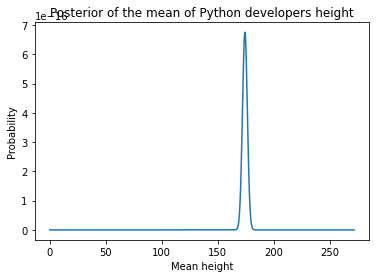

In [ ]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
world_height_mean = 165
world_height_standard_deviation = 7
mu_candidates = numpy.linspace(0., 272, 1000)
sigma = 7.

def posterior(mu, sigma, x):
    mu_prior = scipy.stats.norm.logpdf(mu, world_height_mean, world_height_standard_deviation * 2)
    return mu_prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()
    
def compute_posteriors(mu_candidates, sigma, x):
    for mu in mu_candidates:
        yield posterior(mu, sigma, x)

%time posteriors = list(compute_posteriors(mu_candidates, sigma, x))

print('Most likely mean height: %.2f' % mu_candidates[numpy.argmax(posteriors)])

pyplot.plot(mu_candidates, numpy.exp(posteriors))
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Posterior of the mean of Python developers height');

A continuación, podemos repetir lo mismo para la desviación estándar, y asumiremos que se conoce la media, 175 cm). Nuevamente probaremos 1,000 valores para la desviación estándar, en este caso entre 0.01 y 25, y usaremos un previo no informado (una distribución uniforme):

CPU times: user 341 ms, sys: 11.3 ms, total: 353 ms
Wall time: 346 ms
Most likely standard deviation height: 4.96


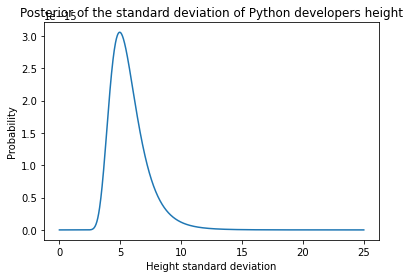

In [ ]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
min_sigma = .01
max_sigma = 25.
# standard deviation can't be 0, so we avoid having it as a candidate
sigma_candidates = numpy.linspace(min_sigma, max_sigma, 1000)
mu = 175.

def posterior(mu, sigma, x):
    sigma_prior = scipy.stats.uniform.logpdf(sigma, min_sigma, max_sigma)
    return sigma_prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()

def compute_posteriors(mu, sigma_candidates, x):
    for sigma in sigma_candidates:
        yield posterior(mu, sigma, x)

%time posteriors = list(compute_posteriors(mu, sigma_candidates, x))

print('Most likely standard deviation height: %.2f' % sigma_candidates[numpy.argmax(posteriors)])

pyplot.plot(sigma_candidates, numpy.exp(posteriors))
pyplot.xlabel('Height standard deviation')
pyplot.ylabel('Probability')
pyplot.title('Posterior of the standard deviation of Python developers height');

Los resultados obtenidos son interesantes, y encontramos que toda la población de programadores de Python se puede modelar con una distribución normal con media alrededor de 175cms y desviación estándar de alrededor de 5cms. También podemos medir nuestra incertidumbre en torno a estos valores y calcular los intervalos en los que es más probable que se encuentren estos valores.

Pero asumimos implícitamente que podemos modelar la media y la desviación estándar de forma independiente. Pero, ¿qué pasa si no son independientes y tomar lo mejor de cada uno por separado no es el mejor conjunto de parámetros?

La solución es fácil, simplemente podemos probar todas las combinaciones de parámetros, de la misma manera que lo hicimos antes:

CPU times: user 8min 17s, sys: 13.5 s, total: 8min 31s
Wall time: 8min 15s
Most likely mean: 174.53
Most likely standard deviation: 4.94


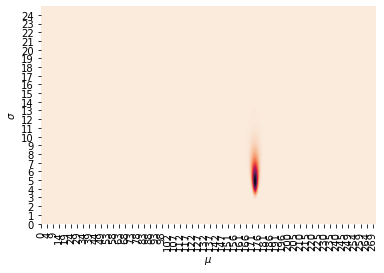

In [ ]:
import numpy
import scipy.stats
import pandas
import matplotlib
import seaborn

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
world_height_mean = 165
world_height_standard_deviation = 7
min_sigma = .01
max_sigma = 25.
mu_candidates = numpy.linspace(0., 272, 1000)
sigma_candidates = numpy.linspace(min_sigma, max_sigma, 1000)

def posterior(mu, sigma, x):
    mu_prior = scipy.stats.norm.logpdf(mu, world_height_mean, world_height_standard_deviation * 2)
    sigma_prior = scipy.stats.uniform.logpdf(sigma, min_sigma, max_sigma)
    return mu_prior + sigma_prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()

def compute_posteriors(mu_candidates, sigma_candidates, x):
    for mu in mu_candidates:
        for sigma in sigma_candidates:
            yield mu, sigma, posterior(mu, sigma, x)

%time results = list(compute_posteriors(mu_candidates, sigma_candidates, x))
results = pandas.DataFrame(results, columns=('mu', 'sigma', 'posterior')).set_index(['mu', 'sigma'])['posterior']

best_mu, best_sigma = results.idxmax('posterior')
print('Most likely mean: %.2f\nMost likely standard deviation: %.2f' % (best_mu, best_sigma))

# Converting index to int, for the plot axis (seaborn has a bug with set_major_formatter)
heatmap_results = -numpy.exp(results.unstack(-1))
heatmap_results.index = heatmap_results.index.astype(int)
heatmap_results = heatmap_results.T
heatmap_results.index = heatmap_results.index.astype(int)

ax = seaborn.heatmap(heatmap_results,
                     xticklabels=18,
                     yticklabels=40,
                     cbar=False)
matplotlib.pyplot.xlabel('$\mu$')
matplotlib.pyplot.ylabel('$\sigma$')
ax.invert_yaxis()

# Tareas

1) Se han presentado varios conceptos de la inferencia estocastica en este codigo (conocimiento posterior, conocimiento condicional, inferencia bayesiana condicional). Para cada uno de ellos, describa resultados de sus corridas en el codigo anterior, con una discusion de los resultados obtenidos

2) Tambien se ha narrado un proceso de juego por ensayo y error con los parametros de la distribucion (inferencia estocastica), base para un proceso de aprendizaje. Describalo con sus palabras (construya el paso a paso presentado)